<h3>Method for evaluating LED Pixel Intensity per sq. area;  Andrew Cox - 7/29/2020</h3>

In [3]:
import cv2
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.color import rgb2gray
from skimage import data, img_as_float
from skimage import exposure
from skimage import filters
%matplotlib inline

In [4]:
#image directory
allfiles=[] #list for holding all image names
im_dir = r"C:\Users\A8DPDZZ\Pictures\Camera Roll\C5_LED-testing\logi"
for file in os.listdir(im_dir):
    if file.endswith('.jpg'):
        print(file)
        allfiles.append(file)

PCB-1_01.jpg
PCB-1_02.jpg
PCB-1_03.jpg
PCB-2_01.jpg
PCB-2_02.jpg
PCB-2_03.jpg
PCB-3_01.jpg
PCB-3_02.jpg
PCB-3_03.jpg
PCB-4_01.jpg
PCB-4_02.jpg
PCB-4_03.jpg
PCB-5_01.jpg
PCB-5_02.jpg
PCB-5_03.jpg


<h3>Processed Images</h3>

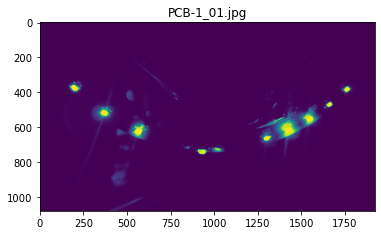

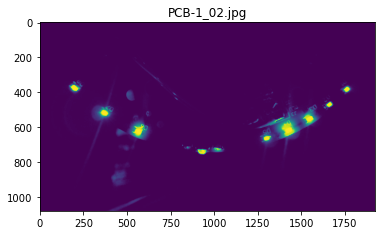

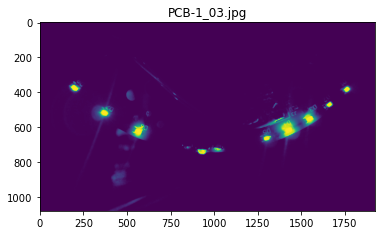

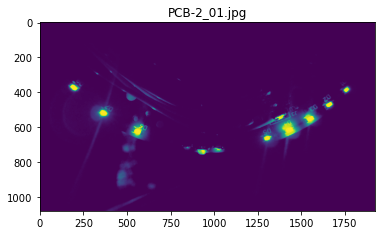

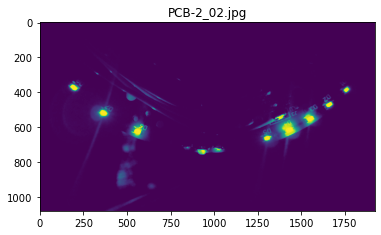

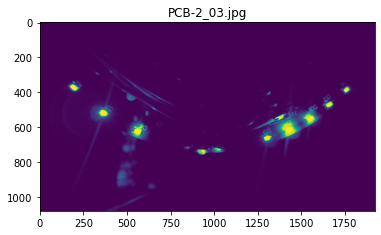

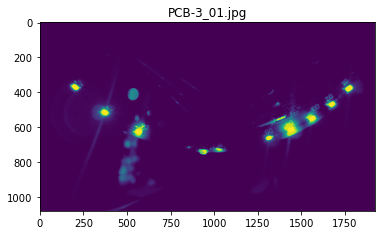

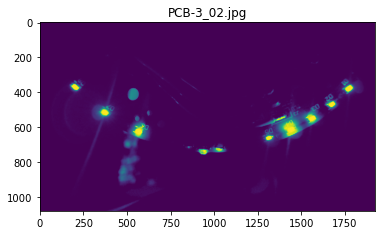

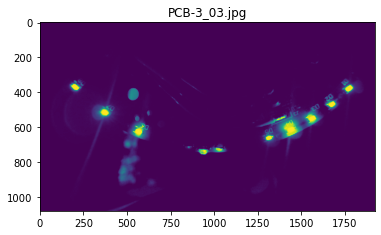

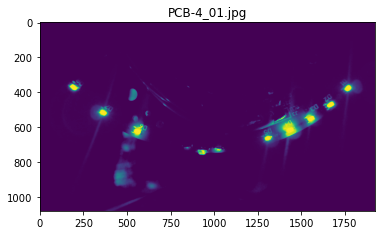

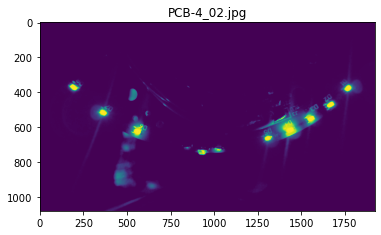

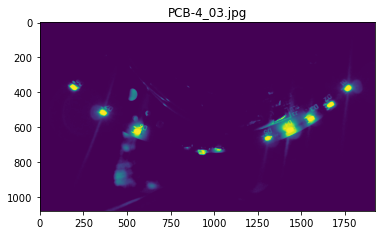

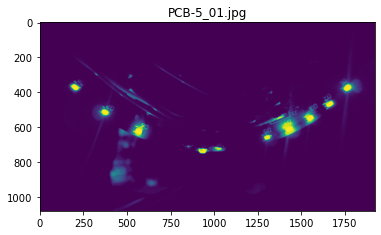

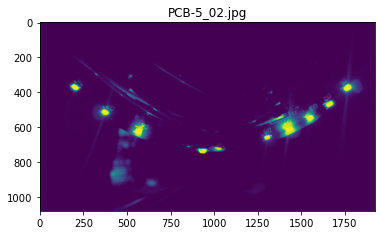

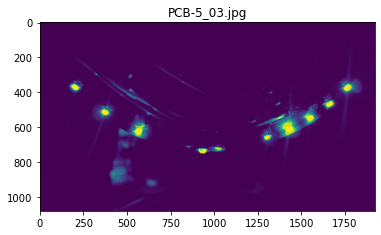

In [5]:
"""
Logitech HD 1080p camera
brightness = 128
focus = 40%
Total images: 15, 3 per PCBA seperated ~1 sec/capture
shroud added to block out ambient light
"""
#converted images to greyscale and apply gaussian blur
for i in range(0,15):
    newfil = im_dir + "\\" + allfiles[i]
    img = mpimg.imread(newfil)#original image
    image_org = rgb2gray(img) #convert image to greyscale
    img_blur = cv2.GaussianBlur(image_org,(5,5),0) #filter noise with gaussian blur 5 radius
    plt.figure()
    plt.imshow(img_blur)
    plt.title(allfiles[i])
    plt.show 

<h3>Develop ROI for D1,D2,D7,D8</h3>

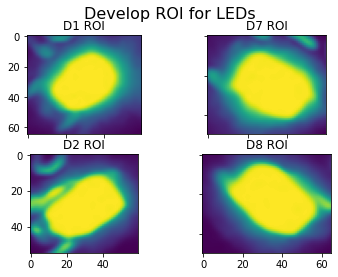

In [6]:
#Roi selection for D1, D2, D7, D8
d1_roi = img_blur[345:410,1725:1800] #ROI for D1 of filtered image (4,875 data points)
d2_roi = img_blur[440:495,1630:1690] #ROI for D2 of filtered image (3,300 data points)
d7_roi = img_blur[490:540,340:400] #ROI for D7 of filtered image (3,000 data points)
d8_roi = img_blur[350:400,165:230] #ROI for D8 of filtered image (3,250 data points)
#print(img_roi) #print ROI pixel values
#return img_roi
fig, axs = plt.subplots(2,2)
fig.suptitle('Develop ROI for LEDs', fontsize = 16)
axs[0,0].imshow(d1_roi)
axs[0,0].set_title("D1 ROI")
axs[1,0].imshow(d2_roi)
axs[1,0].set_title("D2 ROI")
axs[0,1].imshow(d7_roi)
axs[0,1].set_title("D7 ROI")
axs[1,1].imshow(d8_roi)
axs[1,1].set_title("D8 ROI")

for ax in axs.flat: #hide outer x-axis labels
    ax.label_outer()
#plt.figure()
#plt.imshow(d2_roi)

<h3>Statistical Generation for ROI</h3>

In [7]:
#Pixel intensity average for ROI of each image LEDs
print("D1 pixel intensity Avg: ", np.mean(d1_roi)*255)
print("D2 pixel intensity Avg: ", np.mean(d2_roi)*255)
print("D7 pixel intensity Avg: ", np.mean(d7_roi)*255)
print("D8 pixel intensity Avg: ", np.mean(d8_roi)*255)
#Pixel intensity max for ROI of each image LEDs
print("D1 pixel intensity Max: ",np.max(d1_roi)*255)
print("D2 pixel intensity Max: ", np.max(d2_roi)*255)
print("D7 pixel intensity Max: ", np.max(d7_roi)*255)
print("D8 pixel intensity Max: ", np.max(d8_roi)*255)
#Pixel intensity min for ROI of each image LEDs
print("D1 pixel intensity Min: ",np.min(d1_roi)*255)
print("D2 pixel intensity Min: ", np.min(d2_roi)*255)
print("D7 pixel intensity Min: ", np.min(d7_roi)*255)
print("D8 pixel intensity Min: ", np.min(d8_roi)*255)
#Pixel intensity mode for ROI of each image LEDs
print("D1 pixel intensity Median: ",np.median(d1_roi)*255)
print("D2 pixel intensity Median: ",np.median(d2_roi)*255)
print("D7 pixel intensity Median: ",np.median(d7_roi)*255)
print("D8 pixel intensity Median: ",np.median(d8_roi)*255)

D1 pixel intensity Avg:  127.26630363333334
D2 pixel intensity Avg:  131.79066256001423
D7 pixel intensity Avg:  152.0406395308594
D8 pixel intensity Avg:  125.37085318677885
D1 pixel intensity Max:  254.946848046875
D2 pixel intensity Max:  254.58887851562503
D7 pixel intensity Max:  254.59503125
D8 pixel intensity Max:  254.81043906250002
D1 pixel intensity Min:  13.932031249999998
D2 pixel intensity Min:  1.893408203125
D7 pixel intensity Min:  27.359094921874995
D8 pixel intensity Min:  1.586279296875
D1 pixel intensity Median:  102.85105859375
D2 pixel intensity Median:  112.0951267578125
D7 pixel intensity Median:  141.4112533203125
D8 pixel intensity Median:  92.91096484375001


In [8]:
def statgen(d1,d2,d7,d8):
    print(allfiles[i])
    #generates average values of ROI
    d1_mn = (round(np.mean(d1)*255,3))
    print("d1-avg: ", d1_mn)
    d2_mn = round(np.mean(d2)*255,3)
    print("d2-avg: ", d2_mn)
    d7_mn = round(np.mean(d7)*255,3)
    print("d7-avg: ", d7_mn)
    d8_mn = round(np.mean(d8)*255,3)
    print("d8-avg: ", d8_mn)
    #generates median values of ROI
    d1_md = round(np.median(d1)*255,3)
    print("d1-med: ", d1_md)
    d2_md = round(np.median(d2)*255,3)
    print("d2-med: ", d2_md)
    d7_md = round(np.median(d7)*255,3)
    print("d7-med: ", d7_md)
    d8_md = round(np.median(d8)*255,3)
    print("d8-med: ", d8_md)
    #generates max values of ROI
    d1_mx = round(np.max(d1)*255,3)
    print("d1-max: ", d1_mx)
    d2_mx = round(np.max(d2)*255,3)
    print("d2-max: ", d2_mx)
    d7_mx = round(np.max(d7)*255,3)
    print("d7-max: ", d7_mx)
    d8_mx = round(np.max(d8)*255,3)
    print("d8-max: ", d8_mx)
    #generates max values of ROI
    d1_mi = round(np.min(d1)*255,3)
    print("d1-min: ", d1_mi)
    d2_mi = round(np.min(d2)*255,3)
    print("d2-min: ", d1_mi)
    d7_mi = round(np.min(d7)*255,3)
    print("d7-min: ", d7_mi)
    d8_mi = round(np.min(d8)*255,3)
    print("d8-min: ", d8_mi)
    #print stats return
    #return d1,d2,d7,d8

In [9]:
#Statistics output format Test
statgen(d1_roi,d2_roi,d7_roi,d8_roi)
#ax.text(1.02,.25,s,fontsize=8,fontfamily='monospace',alpha = .7,transform=ax.transAxes)

PCB-5_03.jpg
d1-avg:  127.266
d2-avg:  131.791
d7-avg:  152.041
d8-avg:  125.371
d1-med:  102.851
d2-med:  112.095
d7-med:  141.411
d8-med:  92.911
d1-max:  254.947
d2-max:  254.589
d7-max:  254.595
d8-max:  254.81
d1-min:  13.932
d2-min:  13.932
d7-min:  27.359
d8-min:  1.586


<H3>Capture ROI data of Each PCBA</H3>

PCB-1_01.jpg
d1-avg:  54.772
d2-avg:  54.783
d7-avg:  158.319
d8-avg:  123.767
d1-med:  10.432
d2-med:  3.018
d7-med:  149.073
d8-med:  90.305
d1-max:  254.518
d2-max:  254.55
d7-max:  254.941
d8-max:  254.624
d1-min:  0.11
d2-min:  0.11
d7-min:  29.595
d8-min:  1.797
PCB-1_02.jpg
d1-avg:  54.793
d2-avg:  54.896
d7-avg:  150.436
d8-avg:  123.493
d1-med:  10.849
d2-med:  3.194
d7-med:  137.413
d8-med:  91.337
d1-max:  254.773
d2-max:  254.602
d7-max:  254.884
d8-max:  254.723
d1-min:  0.073
d2-min:  0.073
d7-min:  26.414
d8-min:  2.99
PCB-1_03.jpg
d1-avg:  56.878
d2-avg:  53.893
d7-avg:  153.901
d8-avg:  120.091
d1-med:  12.783
d2-med:  2.684
d7-med:  143.316
d8-med:  86.116
d1-max:  254.677
d2-max:  254.239
d7-max:  254.867
d8-max:  254.723
d1-min:  0.11
d2-min:  0.11
d7-min:  27.434
d8-min:  1.854
PCB-2_01.jpg
d1-avg:  47.486
d2-avg:  81.964
d7-avg:  146.907
d8-avg:  118.984
d1-med:  8.537
d2-med:  38.351
d7-med:  129.851
d8-med:  80.497
d1-max:  254.508
d2-max:  254.776
d7-max:  254.

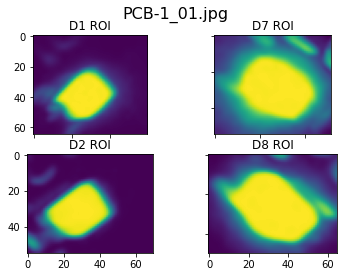

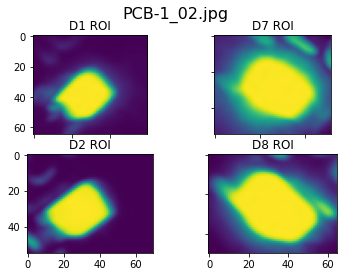

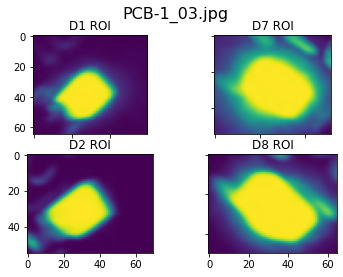

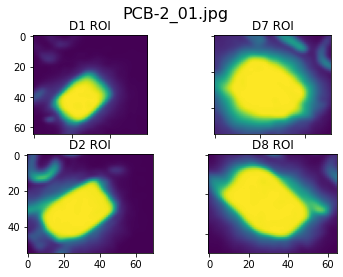

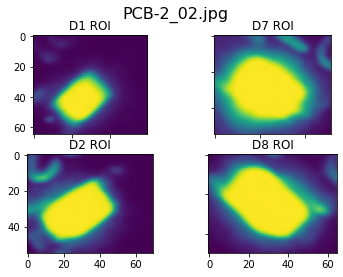

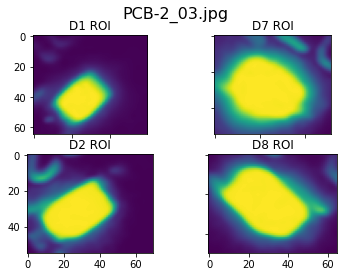

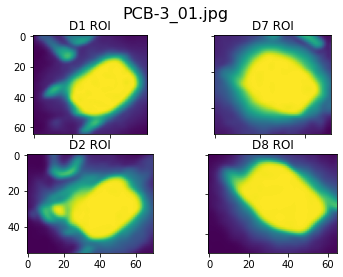

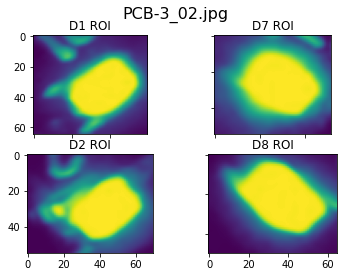

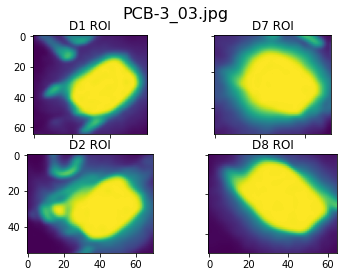

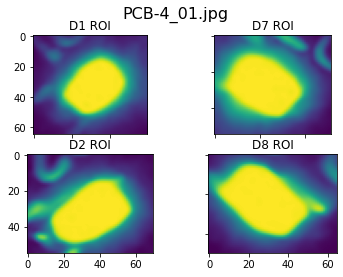

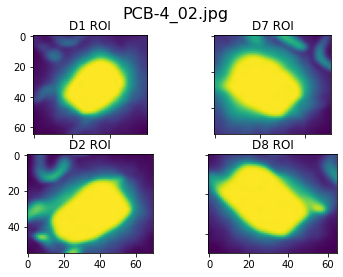

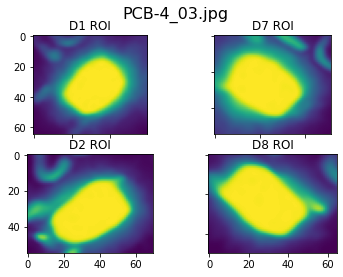

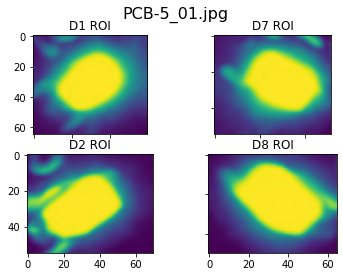

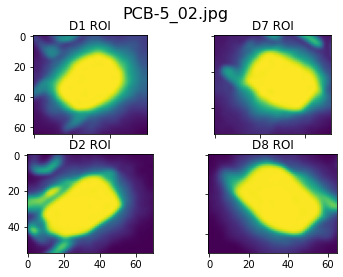

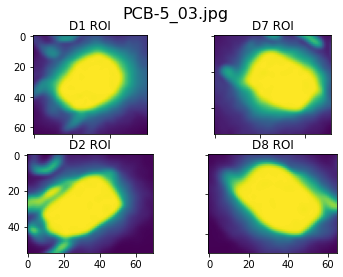

In [10]:
#converted images to greyscale and apply gaussian blur
for i in range(0,15):
    newfil = im_dir + "\\" + allfiles[i]
    img = mpimg.imread(newfil)#original image
    image_org = rgb2gray(img) #convert image to greyscale
    img_blur = cv2.GaussianBlur(image_org,(5,5),0) #filter noise with gaussian blur 5 radius
    #optimized ROI selection for D1, D2, D7, D8 
    d1_roi = img_blur[345:410,1725:1800] #ROI for D1 of filtered image (4,875 data points)
    d2_roi = img_blur[440:495,1630:1700] #ROI for D2 of filtered image (3,850 data points)
    d7_roi = img_blur[490:545,335:400] #ROI for D7 of filtered image (3,575 data points)
    d8_roi = img_blur[350:400,165:230] #ROI for D8 of filtered image (3,250 data points)
    fig, axs = plt.subplots(2,2)
    fig.suptitle(allfiles[i], fontsize = 16)
    axs[0,0].imshow(d1_roi)
    axs[0,0].set_title("D1 ROI")
    axs[1,0].imshow(d2_roi)
    axs[1,0].set_title("D2 ROI")
    axs[0,1].imshow(d7_roi)
    axs[0,1].set_title("D7 ROI")
    axs[1,1].imshow(d8_roi)
    axs[1,1].set_title("D8 ROI")
    for ax in axs.flat: #hide outer x-axis labels
        ax.label_outer()
    statgen(d1_roi,d2_roi,d7_roi,d8_roi) #Statistics generation function

<h3>Develop dataframe for graphical analysis</h3>

In [11]:
data_avg = {'PCB-Num': ['PCB-1', 'PCB-1', 'PCB-1', 'PCB-2','PCB-2','PCB-2',
                       'PCB-3','PCB-3','PCB-3','PCB-4','PCB-4','PCB-4',
                       'PCB-5','PCB-5','PCB-5',
                       'PCB-1', 'PCB-1', 'PCB-1', 'PCB-2','PCB-2','PCB-2',
                       'PCB-3','PCB-3','PCB-3','PCB-4','PCB-4','PCB-4',
                       'PCB-5','PCB-5','PCB-5',
                       'PCB-1', 'PCB-1', 'PCB-1', 'PCB-2','PCB-2','PCB-2',
                       'PCB-3','PCB-3','PCB-3','PCB-4','PCB-4','PCB-4',
                       'PCB-5','PCB-5','PCB-5',
                       'PCB-1', 'PCB-1', 'PCB-1', 'PCB-2','PCB-2','PCB-2',
                       'PCB-3','PCB-3','PCB-3','PCB-4','PCB-4','PCB-4',
                       'PCB-5','PCB-5','PCB-5'], 
        'Pixel_Int.': [54.772, 54.793, 56.878, 47.486, 47.42, 48.284,
                      105.228, 109.823, 104.472,106.79,106.543,110.59,
                      127.116,128.068,127.266,
                      54.783,54.896,53.893,81.964,81.663,79.85,
                      116.311,113.084,118.899,121.53,120.7,116.336,
                      115.466,109.494,115.175,
                      158.319,150.436,153.901,146.907,147.826,148.578,
                      152.4,154.887,150.416,144.467,144.033,143.165,
                      136.985,128.962,135.278,
                      123.767,123.493,120.091,118.984,118.346,115.843,
                      123.083,119.056,125.357,128.433,127.574,121.878,
                      125.68,118.731,125.371], 
        'LED': ['D1', 'D1', 'D1', 'D1','D1','D1',
               'D1','D1','D1','D1','D1','D1',
               'D1','D1','D1',
               'D2', 'D2', 'D2', 'D2','D2','D2',
               'D2','D2','D2','D2','D2','D2',
               'D2','D2','D2',
               'D7', 'D7', 'D7', 'D7','D7','D7',
               'D7','D7','D7','D7','D7','D7',
               'D7','D7','D7',
               'D8', 'D8', 'D8', 'D8','D8','D8',
               'D8','D8','D8','D8','D8','D8',
               'D8','D8','D8']}
df_avg =pd.DataFrame(data_avg) #create dataframe for generating catplot

Text(0.5, 1.0, 'Catplot of Pixel Intensity (sq. area) per PCBA')

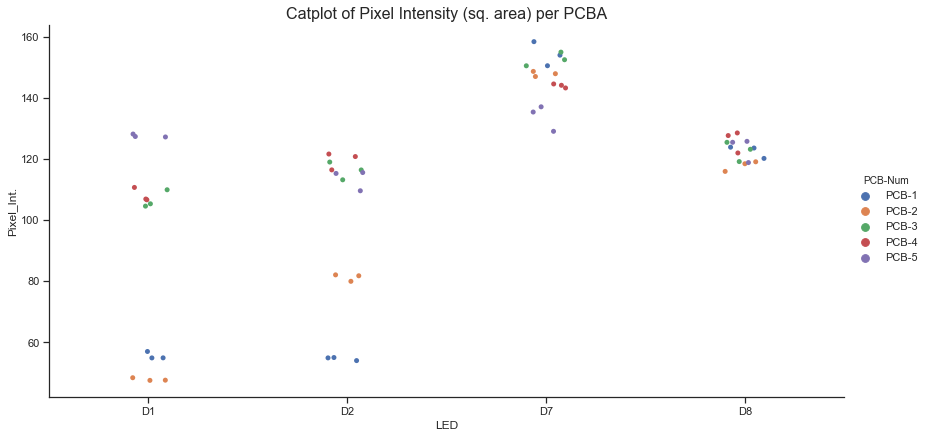

In [25]:
sns.set(style="ticks") #set seaborn styles
g = sns.catplot(x="LED", y="Pixel_Int.", hue="PCB-Num", data=df_avg,
               height=6, aspect=2) #generate catplot with seaborn
plt.title('Catplot of Pixel Intensity (sq. area) per PCBA' , size = 16)

Text(0.5, 1.0, 'Boxplot of Pixel Intensity (sq. area) per PCBA')

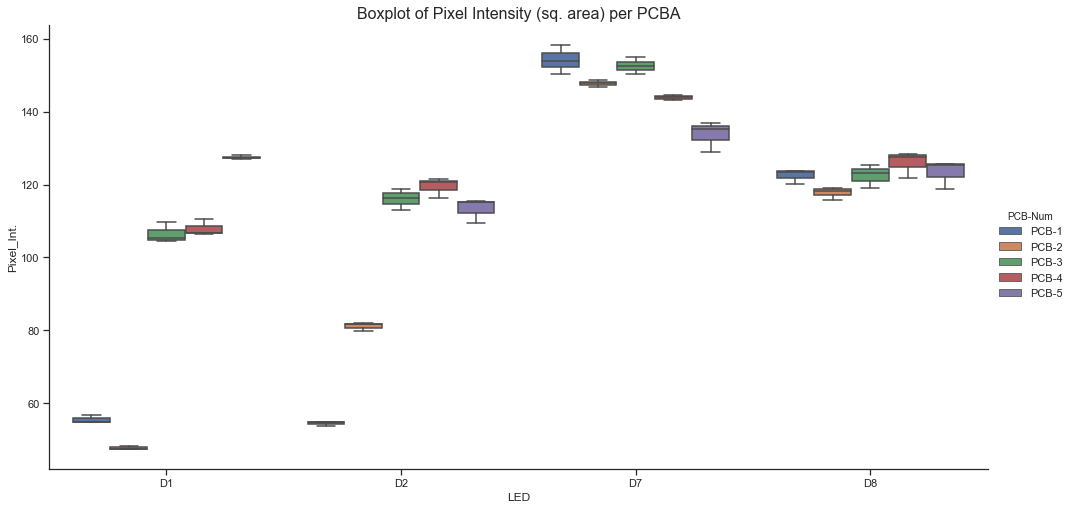

In [24]:

b = sns.catplot(x="LED", y="Pixel_Int.", hue="PCB-Num", data=df_avg,
                kind='box',
               height=7, aspect=2) #generate catplot with seaborn
plt.title('Boxplot of Pixel Intensity (sq. area) per PCBA' , size = 16)